# Project 2020
## Machine Learning and Statistics
#### Due: last commit on or before January 8th, 2021
These are the instructions for the Project assessment for Machine Learning and Statistics
in 2020. The assessment is worth 50% of the marks for the module. Please read
the Using git for assessments [2] document on the Moodle page which applies here. As
always, you must also follow the code of student conduct and the policy on plagiarism [1].
### Instructions
In this project you must create a web service that uses machine learning to make predictions
based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests. Your submission
must be in the form of a git repository containing, at a minimum, the following items:
1. Jupyter notebook that trains a model using the data set. In the notebook you
should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.
To enhance your submission, you might consider developing and comparing more than
one model. Rest assured, all the above concepts will be explored in lecture videos and
other materials in the coming semester.


### Import Libraries

In [1]:
# Efficient numerical arrays.
import numpy as np
# Data frames.
import pandas as pd
# Alternative statistics package.
import statsmodels.stats.weightstats as stat
# Mains statistics package.
import scipy.stats as ss
# Plotting.
import matplotlib.pyplot as plt
# Fancier plotting.
import seaborn as sns

# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

# Nicer colours and styles for plots.
plt.style.use("fivethirtyeight")

### Load Data

In [2]:
# Load the powerproduction dataset from a csv file using read_csv function into dataframe called df
# adapted from https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python and McLoughlin (2019)
df = pd.read_csv("powerproduction.csv")
# Display the dataframe
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


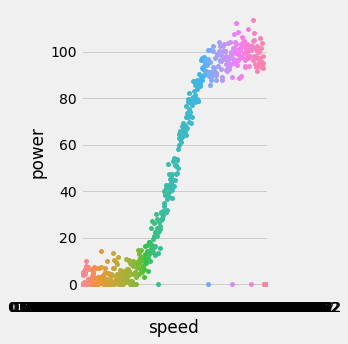

In [3]:
# One type of plot available in seaborn.
sns.catplot(x='speed', y='power', jitter=False, data=df);

### 1.4 Review Data Types <a id='types'></a>

Sharma (2018) recommends that once the data has been loaded, the next step is to review the data-type / features of the data.

Data-Types / Features fall into the following categories:
* numeric (Integers / Floats)
* categorical (Class)
* ordinal (Data that can be ranked in an order)  
* datetime
* coordinates

The Pandas dataframe.dtypes command is used to display the data types/features of dataset

In [5]:
# Use DataFrame.dtypes command to find out the data type (dtype) of each column in the given dataframe. 
# Adapted from https://www.geeksforgeeks.org/python-pandas-dataframe-dtypes/
df.dtypes

speed    float64
power    float64
dtype: object

### 1.5 Data Set Description <a id='description'></a>

By loading the data set and displaying the dataframe and running the dataframe.dtypes command , it's possible to determine some basic details of the dataset as follows: 

* The tips data set is a comma-separated values (csv) file with 244 records (rows of data) and 7 fields (columns).
* Each record (row of data) is located on a separate line, delimited by a line break. 
* The first line of the file is the header line. 
* The header line contains the names of the 7 fields: "total_bill","tip","sex","smoker","day","time","size".
* The fields of data in the header line and each record (row) are delimited with a comma. 
* Each row or data is indexed, the index is shown in the column on the left, but the index is not part of the dataset itself.
* Two columns contain floats, 4 columns contain objects(categorical data) and one column contain integers.

## 2.0 Data Cleaning <a id='cleaning'></a>

Data cleaning is the process of ensuring that your data is correct and useable by identifying any errors in the data, or missing data by correcting or deleting them (Sharma, 2018). 

### 2.1 Detect Missing Data <a id='missing'></a>

Sharma (2018) highlights missing data as a common issue with data sets and can occur when no data value is recorded for the variable in an observation. Missing data can have a significant impact on the conclusions that can be drawn from the data. 

In [6]:
# Check if the dataframe has missing data using the pandas.isnull(obj) function. 
# adapted from https://confusedcoders.com/data-science/cleaning-data-for-data-visualisation
df.isnull().sum() #detect missing values 
# The below results indicate that no data is missing from the array.

speed    0
power    0
dtype: int64

### 2.2 First and Last DataFrame Rows <a id='first'></a>

Having established some basic details about the data set, Willems (2017) suggests that its good idea to take a closer look at the data itself. I used the pandas head() and tail() functions take a look the first and last lines of the data set to see if there was anything unusual.

In [7]:
# Inspect the first 5 rows - adapted from https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python
df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [8]:
# Inspect the last 5 rows - adapted from https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python
df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


### 2.3 Data Cleaning Results  <a id='clean'></a>

The results of the review of the data contained in the first and last dataframe rows are as follows:

* In the main, the values listed under each column, appear to be consistent with the column names. 
    * Numerical values are found in columns where you would expect to find them, i.e. total_bill, tip and size
    * There are string values consistent with column names;  sex & smoker
* The columns labelled 'day' and 'time' have string values instead of datetime values, which you would normally expect.
* The day column contains string values, which limits the kind of analysis you can do with as it is categorical rather than numerical data. 

## 3.0 Data Pre-Processing <a id='preprocessing'></a>

Now that I have confirmed that the data is clean the next step is to prepare the data for analysis (data preprocessing).

Sharma (2018), describes data preprocessing as a data analysis technique that involves transforming raw data into an understandable format. Preprocessing activities include normalisation and standardisation, transformation, feature extraction and selection. The output of data preprocessing is the final training dataset.

### 3.4 Outliers <a id='outliers'></a>

Willems (2017), describes outliers as data that contain values that diverge heavily from the majority of other data. These values are easily identified when you plot the data as the data points appear to lie outside the “expected” area of the plot. Outliers are often caused by data entry or recording errors. Your data needs to be screened for outliers as they can have a signficant effect on the results of the typical summary statistics and can influence the machine learning algorithms such as Linear Regression Models.

Willems (2017) suggests some approachs to handling outliers, including deleting the values, transforming the values using an algorithm (e.g. K Nearest Neighbours), or  replacing the values with the mean/mode/median value. Before deciding which approach is best, you first need to have a clear understanding of the data and the likely causes of the outliers.  

The normal tip percentage is between 15 and 20%, a tip% of 40%+ would represent a significant outlier. So I decided to test this assumption, see below.